In [1]:
!pip install snowflake-connector-python pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 782.4 kB/s eta 0:00:0000:0100:01
  Using cached asn1crypto-1.5.1-py2.py3-none-any.whl (105 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 1.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 2.5.2
    Uninstalling platformdirs-2.5.2:
      Successfully uninstalled platformdirs-2.5.2
  Attempting uninstall: cryptography
    Found existing installation: cryptography 44.0.2
    Uninstalling cryptography-44.0.2:
      Successfully uninstalled cryptography-44.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
spyder 5.4.3 requires pyqt5<5.16, which is not installed.
spyder 5.4.3 requires pyqtwebengine<5.16, which is not installed.
python-lsp-black 1.2.1 requires blac

In [2]:
import snowflake.connector

In [36]:
conn = snowflake.connector.connect(
    user='ABDELRAHMAN1ZAID1',
    password='!6z:8MUULDpAXi!',
    account='DRTSSDW-CB27875',  
    warehouse='COMPUTE_WH',
    database='FOREX_RATES',
    schema='PUBLIC'
)

In [4]:
import pandas as pd

In [37]:
query = "SHOW TABLES"
tables_df = pd.read_sql(query, conn)
print(tables_df[['name', 'database_name', 'schema_name']])

/tmp/ipykernel_617880/2717223802.py:2: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



                  name          database_name  schema_name
0        FOREX_EUR_EGP             FOREX_DATA       BRONZE
1        FOREX_EUR_USD             FOREX_DATA       BRONZE
2        FOREX_USD_EGP             FOREX_DATA       BRONZE
3         DIM_CALENDAR             FOREX_DATA         GOLD
4   DIM_CURRENCY_PAIRS             FOREX_DATA         GOLD
..                 ...                    ...          ...
89              ORDERS  SNOWFLAKE_SAMPLE_DATA  TPCH_SF1000
90                PART  SNOWFLAKE_SAMPLE_DATA  TPCH_SF1000
91            PARTSUPP  SNOWFLAKE_SAMPLE_DATA  TPCH_SF1000
92              REGION  SNOWFLAKE_SAMPLE_DATA  TPCH_SF1000
93            SUPPLIER  SNOWFLAKE_SAMPLE_DATA  TPCH_SF1000

[94 rows x 3 columns]


In [38]:
import pandas as pd

query = "SELECT * FROM FOREX_DATA.SILVER.FOREX_RATES"
df = pd.read_sql(query, conn)

print(df.head())


/tmp/ipykernel_617880/4271620261.py:4: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



         DATE CURRENCY_PAIR  OPEN_RATE  HIGH_RATE  LOW_RATE  CLOSE_RATE  \
0  2025-04-11       EUR/USD    1.11918    1.14736   1.11918     1.13580   
1  2025-04-10       EUR/USD    1.09497    1.12414   1.09426     1.11888   
2  2025-04-09       EUR/USD    1.09564    1.10952   1.09130     1.09503   
3  2025-04-08       EUR/USD    1.09112    1.09918   1.08881     1.09565   
4  2025-04-07       EUR/USD    1.09148    1.10500   1.09007     1.09112   

              INSERTED_AT  
0 2025-04-13 09:35:55.296  
1 2025-04-13 09:35:55.296  
2 2025-04-13 09:35:55.296  
3 2025-04-13 09:35:55.296  
4 2025-04-13 09:35:55.296  


In [39]:
df

,DATE,CURRENCY_PAIR,OPEN_RATE,HIGH_RATE,LOW_RATE,CLOSE_RATE,INSERTED_AT
0,2025-04-11,EUR/USD,1.11918,1.14736,1.11918,1.13580,2025-04-13 09:35:55.296
1,2025-04-10,EUR/USD,1.09497,1.12414,1.09426,1.11888,2025-04-13 09:35:55.296
2,2025-04-09,EUR/USD,1.09564,1.10952,1.09130,1.09503,2025-04-13 09:35:55.296
3,2025-04-08,EUR/USD,1.09112,1.09918,1.08881,1.09565,2025-04-13 09:35:55.296
4,2025-04-07,EUR/USD,1.09148,1.10500,1.09007,1.09112,2025-04-13 09:35:55.296
...,...,...,...,...,...,...,...
10401,2014-11-13,USD/EGP,7.15000,7.15000,7.13000,7.15000,2025-04-13 09:36:00.110
10402,2014-11-11,USD/EGP,7.15000,7.15000,7.15000,7.15000,2025-04-13 09:36:00.110
10403,2016-02-16,USD/EGP,7.79000,7.83000,7.79000,7.83000,2025-04-13 09:36:00.110
10404,2015-10-19,USD/EGP,7.93000,8.00000,7.93000,8.00000,2025-04-13 09:36:00.110


In [40]:
df = df.rename(columns={'OPEN_RATE': 'Open', 'HIGH_RATE': 'High','LOW_RATE':'Low','CLOSE_RATE':'Close'})

# ML Model

In [41]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import ta
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb

In [42]:
# Step 1: Load Data
df['DATE'] = pd.to_datetime(df['DATE'])
df.sort_values('DATE', inplace=True)
df.reset_index(drop=True, inplace=True)

In [43]:
# Step 2: Feature Engineering
df['HL'] = df['High'] - df['Low']
df['OC'] = df['Close'] - df['Open']
df['BODY'] = abs(df['Close'] - df['Open'])

In [44]:
# Technical indicators
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()
df['EMA_12'] = ta.trend.ema_indicator(df['Close'], window=12)
df['EMA_26'] = ta.trend.ema_indicator(df['Close'], window=26)
df['MACD'] = df['EMA_12'] - df['EMA_26']
bb = ta.volatility.BollingerBands(df['Close'])
df['BB_HIGH'] = bb.bollinger_hband()
df['BB_LOW'] = bb.bollinger_lband()
df['STOCH'] = ta.momentum.StochasticOscillator(df['High'], df['Low'], df['Close']).stoch()


In [45]:
# Rolling features
for window in [3, 5, 10]:
    df[f'CLOSE_ROLL_MEAN_{window}'] = df['Close'].rolling(window).mean()
    df[f'CLOSE_ROLL_STD_{window}'] = df['Close'].rolling(window).std()
    df[f'HL_ROLL_MEAN_{window}'] = df['HL'].rolling(window).mean()
    df[f'OC_ROLL_MEAN_{window}'] = df['OC'].rolling(window).mean()

In [46]:
# Time features
df['HOUR'] = df['DATE'].dt.hour
df['DAY_OF_WEEK'] = df['DATE'].dt.dayofweek

In [47]:
# Step 3: Candlestick Pattern Features
df['IS_BULLISH'] = (df['Close'] > df['Open']).astype(int)
df['IS_BEARISH'] = (df['Close'] < df['Open']).astype(int)
df['IS_DOJI'] = (abs(df['Close'] - df['Open']) < (df['High'] - df['Low']) * 0.1).astype(int)

df['BODY'] = abs(df['Close'] - df['Open'])
df['IS_HAMMER'] = ((df['High'] - df['Low']) > 3 * df['BODY']) & \
                  ((df['Close'] - df['Low']) / (df['High'] - df['Low'] + 1e-9) > 0.6) & \
                  ((df['Open'] - df['Low']) / (df['High'] - df['Low'] + 1e-9) > 0.6)
df['IS_HAMMER'] = df['IS_HAMMER'].astype(int)

df['IS_INV_HAMMER'] = ((df['High'] - df['Low']) > 3 * df['BODY']) & \
                      ((df['High'] - df['Close']) / (df['High'] - df['Low'] + 1e-9) > 0.6) & \
                      ((df['High'] - df['Open']) / (df['High'] - df['Low'] + 1e-9) > 0.6)
df['IS_INV_HAMMER'] = df['IS_INV_HAMMER'].astype(int)

df['PREV_OPEN'] = df['Open'].shift(1)
df['PREV_CLOSE'] = df['Close'].shift(1)

df['BULLISH_ENGULFING'] = ((df['IS_BULLISH'] == 1) &
                           (df['PREV_CLOSE'] < df['PREV_OPEN']) &
                           (df['Open'] < df['PREV_CLOSE']) &
                           (df['Close'] > df['PREV_OPEN'])).astype(int)

df['BEARISH_ENGULFING'] = ((df['IS_BEARISH'] == 1) &
                           (df['PREV_CLOSE'] > df['PREV_OPEN']) &
                           (df['Open'] > df['PREV_CLOSE']) &
                           (df['Close'] < df['PREV_OPEN'])).astype(int)

In [48]:
df

,DATE,CURRENCY_PAIR,Open,High,Low,Close,INSERTED_AT,HL,OC,BODY,...,DAY_OF_WEEK,IS_BULLISH,IS_BEARISH,IS_DOJI,IS_HAMMER,IS_INV_HAMMER,PREV_OPEN,PREV_CLOSE,BULLISH_ENGULFING,BEARISH_ENGULFING
0,2006-02-10,EUR/USD,1.19780,1.20250,1.18960,1.1906,2025-04-13 09:35:55.296,0.01290,-0.00720,0.00720,...,4,0,1,0,0,0,NaN,NaN,0,0
1,2006-02-13,EUR/USD,1.18980,1.19220,1.18760,1.1896,2025-04-13 09:35:55.296,0.00460,-0.00020,0.00020,...,0,0,1,1,0,0,1.19780,1.19060,0,0
2,2006-02-14,EUR/USD,1.18950,1.19230,1.18570,1.1914,2025-04-13 09:35:55.296,0.00660,0.00190,0.00190,...,1,1,0,0,0,0,1.18980,1.18960,1,0
3,2006-02-15,EUR/USD,1.19150,1.19540,1.18680,1.1888,2025-04-13 09:35:55.296,0.00860,-0.00270,0.00270,...,2,0,1,0,0,0,1.18950,1.19140,0,1
4,2006-02-16,EUR/USD,1.18870,1.19090,1.18460,1.1903,2025-04-13 09:35:55.296,0.00630,0.00160,0.00160,...,3,1,0,0,1,0,1.19150,1.18880,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10401,2025-04-10,EUR/EGP,56.53330,58.07310,55.91670,57.3874,2025-04-13 09:35:58.906,2.15640,0.85410,0.85410,...,3,1,0,0,0,0,1.09497,1.11888,0,0
10402,2025-04-10,USD/EGP,51.63000,51.66000,51.10000,51.2900,2025-04-13 09:36:00.110,0.56000,-0.34000,0.34000,...,3,0,1,0,0,0,56.53330,57.38740,0,0
10403,2025-04-11,USD/EGP,51.28000,51.29000,51.28000,51.2800,2025-04-13 09:36:00.110,0.01000,0.00000,0.00000,...,4,0,0,1,0,1,51.63000,51.29000,0,0
10404,2025-04-11,EUR/EGP,57.39160,58.84810,57.39160,58.2438,2025-04-13 09:35:58.906,1.45650,0.85220,0.85220,...,4,1,0,0,0,0,51.28000,51.28000,0,0


In [49]:
import plotly.graph_objects as go

# Step 6: Visualization
plot_df = df[-200:].copy()

fig = go.Figure(data=[
    go.Candlestick(
        x=plot_df['DATE'],
        open=plot_df['Open'],  
        high=plot_df['High'],
        close=plot_df['Close'], 
        name="OHLC"
    )
])
# Add markers for patterns
def add_marker(condition, name, color, y_offset=0):
    dates = plot_df[condition]['DATE']
    prices = plot_df[condition]['High'] + y_offset  
    fig.add_trace(go.Scatter(
        x=dates,
        y=prices,
        mode='markers',
        marker=dict(size=8, color=color),
        name=name
    ))

add_marker(plot_df['IS_DOJI'] == 1, 'Doji', 'orange')
add_marker(plot_df['IS_HAMMER'] == 1, 'Hammer', 'green')
add_marker(plot_df['IS_INV_HAMMER'] == 1, 'Inv Hammer', 'blue')
add_marker(plot_df['BULLISH_ENGULFING'] == 1, 'Bull Engulfing', 'lime')
add_marker(plot_df['BEARISH_ENGULFING'] == 1, 'Bear Engulfing', 'red')

fig.update_layout(
    title='Forex Candlestick Patterns with ML Features',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True,  
    xaxis_rangeslider_thickness=0.1,  
    xaxis=dict(
        rangeslider=dict(visible=True),
        type='date'  
    ),
    height=700
)

fig.show()

In [50]:
# Drop non-numeric and irrelevant columns before training
exclude_cols = ['DATE', 'TARGET', 'CURRENCY_PAIR'] if 'CURRENCY_PAIR' in df.columns else ['DATE', 'TARGET']
features = [col for col in df.columns if col not in exclude_cols]

In [51]:
# Step 4: Create Target Variable
df['TARGET'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df.dropna(inplace=True)

In [53]:
# Drop rows with NaNs (just in case)
df.dropna(inplace=True)

non_numeric_cols = df.select_dtypes(include=['datetime64[ns]', 'object']).columns.tolist()
non_features = non_numeric_cols + ['TARGET']
features = [col for col in df.columns if col not in non_features]

X = df[features].select_dtypes(include=[np.number])
y = df['TARGET']

In [54]:
# Split data
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]


In [55]:
# Time-based split
split_idx = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

In [56]:
# Train LightGBM model
model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4130, number of negative: 4174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001508 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7159
[LightGBM] [Info] Number of data points in the train set: 8304, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497351 -> initscore=-0.010597
[LightGBM] [Info] Start training from score -0.010597


LGBMClassifier(learning_rate=0.05)

In [57]:
# Evaluation
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Model Test Accuracy: {acc:.2%}")

Model Test Accuracy: 80.40%


[LightGBM] [Info] Number of positive: 4130, number of negative: 4174
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006128 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7159
[LightGBM] [Info] Number of data points in the train set: 8304, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497351 -> initscore=-0.010597
[LightGBM] [Info] Start training from score -0.010597
Accuracy: 0.8040442946557534
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1052
           1       0.93      0.65      0.77      1025

    accuracy                           0.80      2077
   macro avg       0.83      0.80      0.80      2077
weighted avg       0.83      0.80      0.80      2077



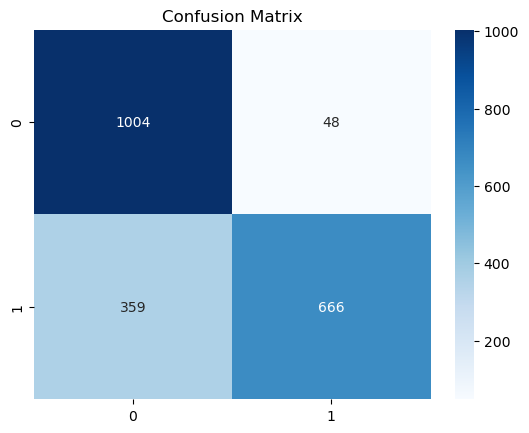

In [58]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.05)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()